# Try-it Activity 3.2: Analyzing Electoral Democracies and Autocracies

This notebook analyzes data about electoral democracies by age and autocracies across different years. We'll explore how the distribution of democracies and autocracies has changed over time globally.

## Step 1: Import Required Libraries

In this first step, we import the necessary Python libraries for data analysis and visualization:
- `seaborn` (sns): For creating statistical visualizations
- `numpy` (np): For numerical operations
- `matplotlib.pyplot` (plt): For creating plots and charts
- `pandas` (pd): For data manipulation and analysis


In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Step 2: Load and Explore the Dataset

We load the dataset containing information about electoral democracies and autocracies from a CSV file. Then we perform initial exploration to understand the data structure.


In [2]:
# Load the dataset from CSV file
df = pd.read_csv('number-electoral-democracies-age.csv')
# Display the last few rows to get a sense of the data
df.tail()


,Entity,Code,Year,number_electdem_91plus_row_owid,number_electdem_90_row_owid,number_electdem_60_row_owid,number_electdem_30_row_owid,number_electdem_18_row_owid,number_electaut_row_owid,number_closedaut_row_owid
1633,World,OWID_WRL,2018,10,12,18,30,24,61,23
1634,World,OWID_WRL,2019,10,12,17,30,23,62,24
1635,World,OWID_WRL,2020,10,13,25,23,21,62,24
1636,World,OWID_WRL,2021,10,13,30,17,21,59,28
1637,World,OWID_WRL,2022,10,14,30,16,20,58,30


### Exploring Unique Entities

Let's check what unique entities (countries/regions) are present in our dataset.


In [3]:
# Display all unique entities in the dataset
df['Entity'].unique()

array(['Africa', 'Asia', 'Europe', 'North America', 'Oceania',
       'South America', 'World'], dtype=object)

## Step 3: Data Transformation

Now we'll transform the data to prepare it for visualization. This involves several steps:
1. Grouping the data by Entity and Year
2. Filtering for specific years and the "World" entity
3. Reshaping the data for easier visualization


In [4]:
# Group data by Entity and Year, summing the democracy/autocracy counts
df1 = df.groupby(['Entity','Year'] ).sum()[['number_electdem_91plus_row_owid',
                                'number_electdem_90_row_owid',
                                'number_electdem_60_row_owid',
                                'number_electdem_30_row_owid',
                                'number_electdem_18_row_owid',
                                'number_electaut_row_owid',
                                'number_closedaut_row_owid']].reset_index()

# Filter for specific years (1970-2022, decade intervals) and only the "World" entity
df2 = df1.query('(Year == 2022 or Year == 2010 or Year == 2000 or Year == 1990 or Year == 1980 or Year == 1970) and Entity == "World" ' )[['number_electdem_91plus_row_owid',
                                'number_electdem_90_row_owid',
                                'number_electdem_60_row_owid',
                                'number_electdem_30_row_owid',
                                'number_electdem_18_row_owid',
                                'number_electaut_row_owid',
                                'number_closedaut_row_owid', 'Year']]
# Display the filtered dataframe
df2


,number_electdem_91plus_row_owid,number_electdem_90_row_owid,number_electdem_60_row_owid,number_electdem_30_row_owid,number_electdem_18_row_owid,number_electaut_row_owid,number_closedaut_row_owid,Year
1585,2,2,7,15,10,38,82,1970
1595,3,4,15,4,15,38,77,1980
1605,3,7,14,4,34,46,63,1990
1615,4,6,18,8,49,57,35,2000
1625,7,14,13,25,34,60,23,2010
1637,10,14,30,16,20,58,30,2022


### Reshaping Data for Visualization

We'll use the pandas `melt` function to reshape the data from wide to long format, which is better suited for visualization with seaborn. The commented code shows an alternative ordering that was considered but not used.

In [5]:
# The commented code below shows an alternative ordering of variables that was considered
#df3 = pd.melt(df2, id_vars=['Year'], 
#              value_vars=['number_electdem_91plus_row_owid',
#                                'number_electdem_90_row_owid',
#                                'number_electdem_60_row_owid',
#                                'number_electdem_30_row_owid',
#                                'number_electdem_18_row_owid',
#                                'number_electaut_row_owid',
#                                'number_closedaut_row_owid'],
#              var_name='DemocraciesAge', 
#              value_name='Number')

# Reshape data from wide to long format using melt
# Note: We order the variables from autocracies to oldest democracies for better visualization
df3 = pd.melt(df2, id_vars=['Year'], 
              value_vars=['number_closedaut_row_owid',
                         'number_electaut_row_owid',
                         'number_electdem_18_row_owid',
                         'number_electdem_30_row_owid',
                         'number_electdem_60_row_owid',
                         'number_electdem_90_row_owid',
                          'number_electdem_91plus_row_owid'
                         ],
              var_name='DemocraciesAge', 
              value_name='Number')


### Renaming Categories for Better Readability

Now we'll replace the technical column names with more readable labels for our visualization.


In [6]:
# Replace technical column names with human-readable labels
df3['DemocraciesAge'] = df3['DemocraciesAge'].replace('number_electdem_91plus_row_owid', '91 years + ')
df3['DemocraciesAge'] = df3['DemocraciesAge'].replace('number_electdem_90_row_owid', '61 - 90 years')
df3['DemocraciesAge'] = df3['DemocraciesAge'].replace('number_electdem_60_row_owid', '31 - 60 years')
df3['DemocraciesAge'] = df3['DemocraciesAge'].replace('number_electdem_30_row_owid', '19 - 30 years')
df3['DemocraciesAge'] = df3['DemocraciesAge'].replace('number_electdem_18_row_owid', '1 - 18 years')
df3['DemocraciesAge'] = df3['DemocraciesAge'].replace('number_electaut_row_owid', 'Electoral autocracies')
df3['DemocraciesAge'] = df3['DemocraciesAge'].replace('number_closedaut_row_owid', 'Closed autocracies')

# Display the transformed dataframe
df3

,Year,DemocraciesAge,Number
0,1970,Closed autocracies,82
1,1980,Closed autocracies,77
2,1990,Closed autocracies,63
3,2000,Closed autocracies,35
4,2010,Closed autocracies,23
5,2022,Closed autocracies,30
6,1970,Electoral autocracies,38
7,1980,Electoral autocracies,38
8,1990,Electoral autocracies,46
9,2000,Electoral autocracies,57


## Step 4: Data Visualization

Now we'll create a bar plot to visualize how the number of democracies (by age) and autocracies has changed over the selected years (1970-2022).


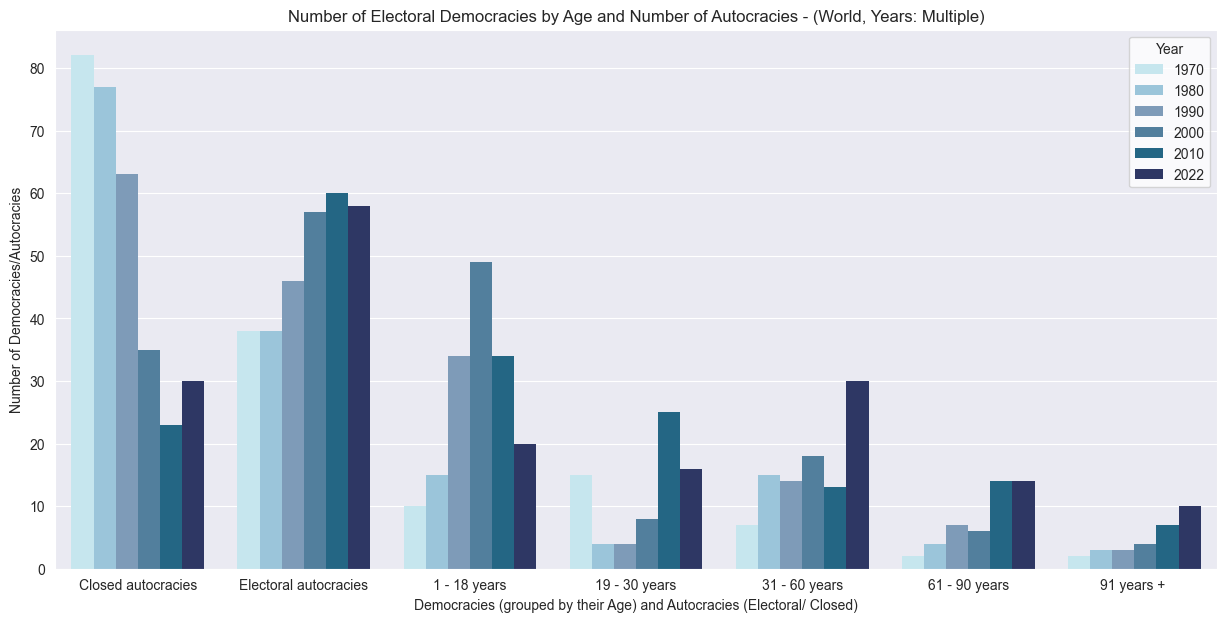

In [7]:
# Create a figure with specified size
#plt.figure(figsize = (15,8))
fig, ax = plt.subplots(figsize=(15, 7))

# Set the title for the plot
plt.title('Number of Electoral Democracies by Age and Number of Autocracies - (World, Years: Multiple)')

# Set the style for the plot - using a clean whitegrid style
sns.set_style("whitegrid")
#sns.set_style("dark")  # Alternative style that was considered

# Create a grouped bar plot using seaborn
sns.barplot(data = df3, 
            x ='DemocraciesAge', y = 'Number', hue = 'Year',
            #capsize=0,  # No error bars
            # Custom color palette for different years
            palette=['#BFEAF5', '#91C8E4', '#749BC2', '#4682A9', '#146C94', '#25316D'],
            edgecolor='none',  # No edges on bars for cleaner look
            ax=ax )

# The commented code below would add value labels to the bars
#ax.bar_label(ax.containers[0],
#             fmt='%.f', label_type='edge')
#ax.bar_label(ax.containers[1],
#             fmt='%.f', label_type='edge')
#ax.bar_label(ax.containers[2],
#             fmt='%.f', label_type='edge')

# Add axis labels
plt.xlabel("Democracies (grouped by their Age) and Autocracies (Electoral/ Closed)")
plt.ylabel("Number of Democracies/Autocracies")

# Save the figure as a PNG file with high resolution
plt.savefig('Number_ofDemAut.png', dpi =200)

# Alternative color palettes that were considered but not used
#sns.plotting_context()
#['#D3E0EA', '#1687A7']
#['#EEEBDD', '#810000']
#['#256D85', '#8FE3CF']
#['#FF4B5C', '#056674', '#66BFBF']


## Conclusion

This analysis visualizes the global trends in democracies and autocracies from 1970 to 2022. The bar chart shows:

1. How the number of democracies in different age categories has changed over time
2. The evolution of both electoral and closed autocracies
3. The overall shift in political systems worldwide over the past five decades

The visualization helps us understand the democratic development globally, showing which types of political systems have become more or less common over time.
